# Tutorial 8: Spatial Navigation

Spatial navigation lets you work with PDF content based on the physical layout of elements on the page. It's perfect for finding elements relative to each other and extracting information in context.

In [1]:
from natural_pdf import PDF

# Load a PDF
pdf = PDF("pdfs/01-practice.pdf")
page = pdf.pages[0]

# Find the title of the document
title = page.find('text:contains("Jungle Health")')

# Visualize our starting point
title.show(color="red", label="Document Title")

# Display the title text
title.text

'Jungle Health and Safety Inspection Service'

## Finding Elements Above and Below

In [2]:
# Create a region below the title
region_below = title.below(height=100)

# Visualize the region
region_below.show(color="blue", label="Below Title")

# Find and extract text from this region
text_below = region_below.extract_text()
text_below

'I INS-UP70N51NCL41R N S - U P 7 0 N 5 1 N C L 4 1 R S Site:  i t e :   D Durham’s Meatpacking Chicago, Ill. u r h a m ’ s   M e a t p a c k i n g     C h i c a g o ,   I l l . D Date:  a t e :     F February 3, 1905 e b r u a r y   3 ,   1 9 0 5 V Violation Count:  i o l a t i o n   C o u n t :   7 7'

## Finding Content Between Elements

In [3]:
# Find two labels to serve as boundaries
site_label = page.find('text:contains("Site:")')
date_label = page.find('text:contains("Date:")')

# Get the region between these labels
between_region = site_label.below(
    include_element=True,     # Include starting element
    until='text:contains("Date:")',  # Stop at this element
    include_endpoint=False    # Don't include ending element
)

# Visualize the region between labels
between_region.show(color="green", label="Between")

# Extract text from this bounded area
between_region.extract_text()

'S Site:  i t e :   D Durham’s Meatpacking Chicago, Ill. u r h a m ’ s   M e a t p a c k i n g     C h i c a g o ,   I l l .'

## Navigating Left and Right

In [4]:
# Find a field label
site_label = page.find('text:contains("Site:")')

# Get the content to the right (the field value)
value_region = site_label.right(width=200)

# Visualize the label and value regions
site_label.show(color="red", label="Label")
value_region.show(color="blue", label="Value")

# Extract just the value text
value_region.extract_text()

'D Durham’s Meatpacking Chicago, Ill. u r h a m ’ s   M e a t p a c k i n g     C h i c a g o ,   I l l .   F February 3, 1905 e b r u a r y   3 ,   1 9 0 5 Violation Count:  i o n   C o u n t :   7 7 a r y :   W o r s t   o f   a n y ,   h o w e v e r ,   w e r e   t h e   f e r t i l i z   p e o p l e   c o u l d   n o t   b e   s h o w n   t o   t h e   v i s i t o r   -   f o visitor at a hundred yards, and as for the other men, who worked in tank rooms full of steam, and in    a t   a   h u n d r e d   y a r d s ,   a n d   a s   f o r   t h e   o t h e r   m e o f   w h i c h   t h e r e   w e r e   o p e n   v a t s   n e a r   t h e   l e v e l into the vats; and when they were fished out, there was never enough of them left to be worth  e   v a t s ;   a n d   w h e n   t h e y   w e r e   f i s h e d   o u t ,   t h e r e exhibiting - sometimes they would be overlooked for days, till all but the bones of them had gone out t i n g   -   s o m e t i m e s   t h e y   w o u l d 

## Finding Adjacent Elements

In [5]:
# Start with a label element
label = page.find('text:contains("Site:")')

# Find the next and previous elements in reading order
next_elem = label.next()
prev_elem = label.prev()

# Visualize all three elements
label.show(color="red", label="Current")
next_elem.show(color="green", label="Next") if next_elem else None
prev_elem.show(color="blue", label="Previous") if prev_elem else None

# Show the text of adjacent elements
{
    "current": label.text,
    "next": next_elem.text if next_elem else "None",
    "previous": prev_elem.text if prev_elem else "None"
}

{'current': 'Site: ', 'next': 'i', 'previous': 'S'}

## Combining with Element Selectors

In [6]:
# Find a section label
summary = page.find('text:contains("Summary:")')

# Find the next bold text element
next_bold = summary.next('text:bold', limit=20)

# Find the nearest line element
nearest_line = summary.nearest('line')

# Visualize what we found
summary.show(color="red", label="Summary")
next_bold.show(color="blue", label="Next Bold") if next_bold else None
nearest_line.show(color="green", label="Nearest Line") if nearest_line else None

# Show the content we found
{
    "summary": summary.text,
    "next_bold": next_bold.text if next_bold else "None found",
    "nearest_line": nearest_line if nearest_line else "None found"
}

{'summary': 'Summary: ',
 'next_bold': 'u',
 'nearest_line': <LineElement type=horizontal width=2.0 bbox=(50, 352, 550, 352)>}

## Extracting Table Rows with Spatial Navigation

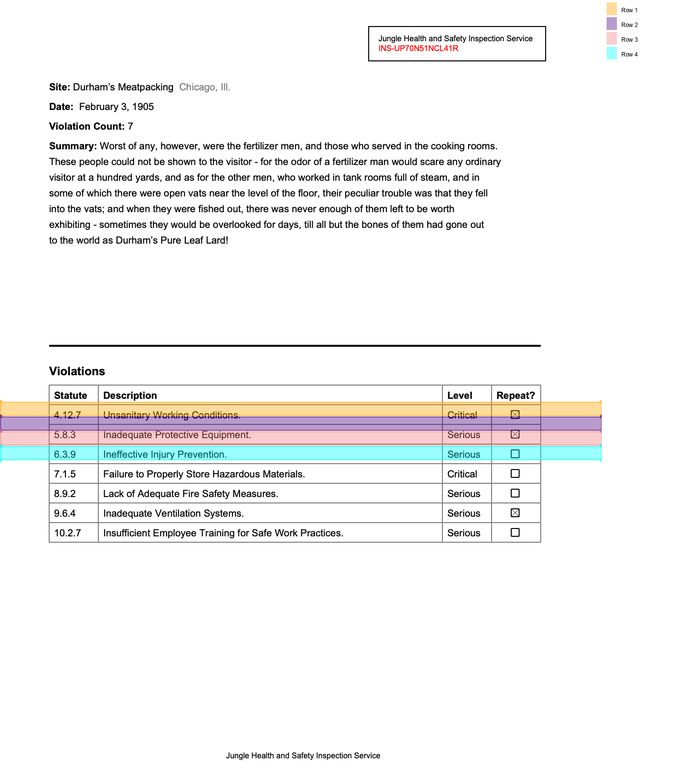

In [7]:
# Find a table heading
table_heading = page.find('text:contains("Statute")')
table_heading.show(color="purple", label="Table Header")

# Extract table rows using spatial navigation
rows = []
current = table_heading

# Get the next 4 rows
for i in range(4):
    # Find the next row below the current one
    next_row = current.below(height=15)
    
    if next_row:
        rows.append(next_row)
        current = next_row  # Move to the next row
    else:
        break

# Visualize all found rows
page.clear_highlights()
for i, row in enumerate(rows):
    row.highlight(label=f"Row {i+1}")
page.to_image(width=700)

In [8]:
# Extract text from each row
[row.extract_text() for row in rows]

['',
 '',
 '5 5.8.3 . 8 . 3 I Inadequate Protective Equipment. n a d e q u a t e   P r o t e c t i v e   E q u i p m e n t . S Serious e r i o u s',
 '6 6.3.9 . 3 . 9 I Ineffective Injury Prevention. n e f f e c t i v e   I n j u r y   P r e v e n t i o n . S Serious e r i o u s']

## Extracting Key-Value Pairs

In [9]:
# Find all potential field labels (text with a colon)
labels = page.find_all('text:contains(":")') 

# Visualize the labels
labels.show(color="blue", label="Labels")

# Extract key-value pairs
field_data = {}

for label in labels:
    # Clean up the label text
    key = label.text.strip().rstrip(':')
    
    # Skip if not a proper label
    if not key:
        continue
    
    # Get the value to the right
    value = label.right(width=200).extract_text().strip()
    
    # Add to our collection
    field_data[key] = value

# Show the extracted data
field_data

{'Site': 'D Durham’s Meatpacking Chicago, Ill. u r h a m ’ s   M e a t p a c k i n g     C h i c a g o ,   I l l .   F February 3, 1905 e b r u a r y   3 ,   1 9 0 5 Violation Count:  i o n   C o u n t :   7 7 a r y :   W o r s t   o f   a n y ,   h o w e v e r ,   w e r e   t h e   f e r t i l i z   p e o p l e   c o u l d   n o t   b e   s h o w n   t o   t h e   v i s i t o r   -   f o visitor at a hundred yards, and as for the other men, who worked in tank rooms full of steam, and in    a t   a   h u n d r e d   y a r d s ,   a n d   a s   f o r   t h e   o t h e r   m e o f   w h i c h   t h e r e   w e r e   o p e n   v a t s   n e a r   t h e   l e v e l into the vats; and when they were fished out, there was never enough of them left to be worth  e   v a t s ;   a n d   w h e n   t h e y   w e r e   f i s h e d   o u t ,   t h e r e exhibiting - sometimes they would be overlooked for days, till all but the bones of them had gone out t i n g   -   s o m e t i m e s   t h e y   w

Spatial navigation mimics how humans read documents, letting you navigate content based on physical relationships between elements. It's especially useful for extracting structured data from forms, tables, and formatted documents. 